##Imports

In [80]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy as sp
import numpy as np
import imblearn
from collections import Counter


def MSEloss(true_value , prediction_value):
    true_value = np.array(true_value)
    prediction_value = np.array(prediction_value)

    MSE =  sum( (true_value - prediction_value)**2 ) / len(true_value)

    return MSE


def BIC(mse , n_samples, j_features):
    n = n_samples
    j = j_features
    bic = n * (np.log(mse)) + j* ( np.log(n) )
    return bic

def AIC(mse , n_samples, j_features):
    n = n_samples
    j = j_features
    aic = n * (np.log(mse)) + 2*j
    return aic

#Data: Internet Firewall Dataset

In [81]:
missing_values = ["n/a", "na", "--", " ", "", "Null", "-", "NaN", "N/A" ]
data = pd.read_csv( "/content/log2.csv" , na_values=missing_values)

data = data.drop( data[data.Action == 'reset-both'].index )
data = data.drop( data[data.Action == 'allow'].sample(frac=0.5, random_state=1 ).index )

print(data["Action"].value_counts())

allow    18820
deny     14987
drop     12851
Name: Action, dtype: int64


In [82]:
label_encoder = preprocessing.LabelEncoder()
data["Action"] = label_encoder.fit_transform(data["Action"])

classes = label_encoder.classes_
print("classes:\n", classes)
encoded_classes = label_encoder.transform(classes)
print("", encoded_classes, "\n\n")

# print(data.info())

features = data.drop(columns=["Action"])
attributes = features.columns.to_list()
num_of_features = len(attributes)

targets = data["Action"]

# print(targets.tail())

classes:
 ['allow' 'deny' 'drop']
 [0 1 2] 




Source Port             0.061413
Destination Port        0.092033
NAT Source Port         0.096696
NAT Destination Port    0.015780
Bytes                   0.000027
Bytes Sent              0.000023
Bytes Received          0.000072
Packets                 0.000033
Elapsed Time (sec)      0.000681
pkts_sent               0.000026
pkts_received           0.000058
dtype: float64


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,46658.000000,46658.000000,46658.000000,46658.000000,4.665800e+04,4.665800e+04,4.665800e+04,4.665800e+04,46658.000000,46658.000000,46658.000000
mean,0.743621,0.196988,0.205946,0.028430,7.321305e-05,2.858066e-05,2.051395e-04,9.253336e-05,0.004873,0.000055,0.000167
std,0.247817,0.303369,0.310959,0.125618,5.154694e-03,4.745553e-03,8.478235e-03,5.733575e-03,0.026088,0.005057,0.007641
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.738937,0.006760,0.000000,0.000000,4.726795e-09,6.325930e-09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,0.820917,0.006790,0.000000,0.000000,7.877992e-09,1.054322e-08,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,0.894772,0.384131,0.397378,0.000809,1.378649e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.003232,0.000000,0.000003
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000


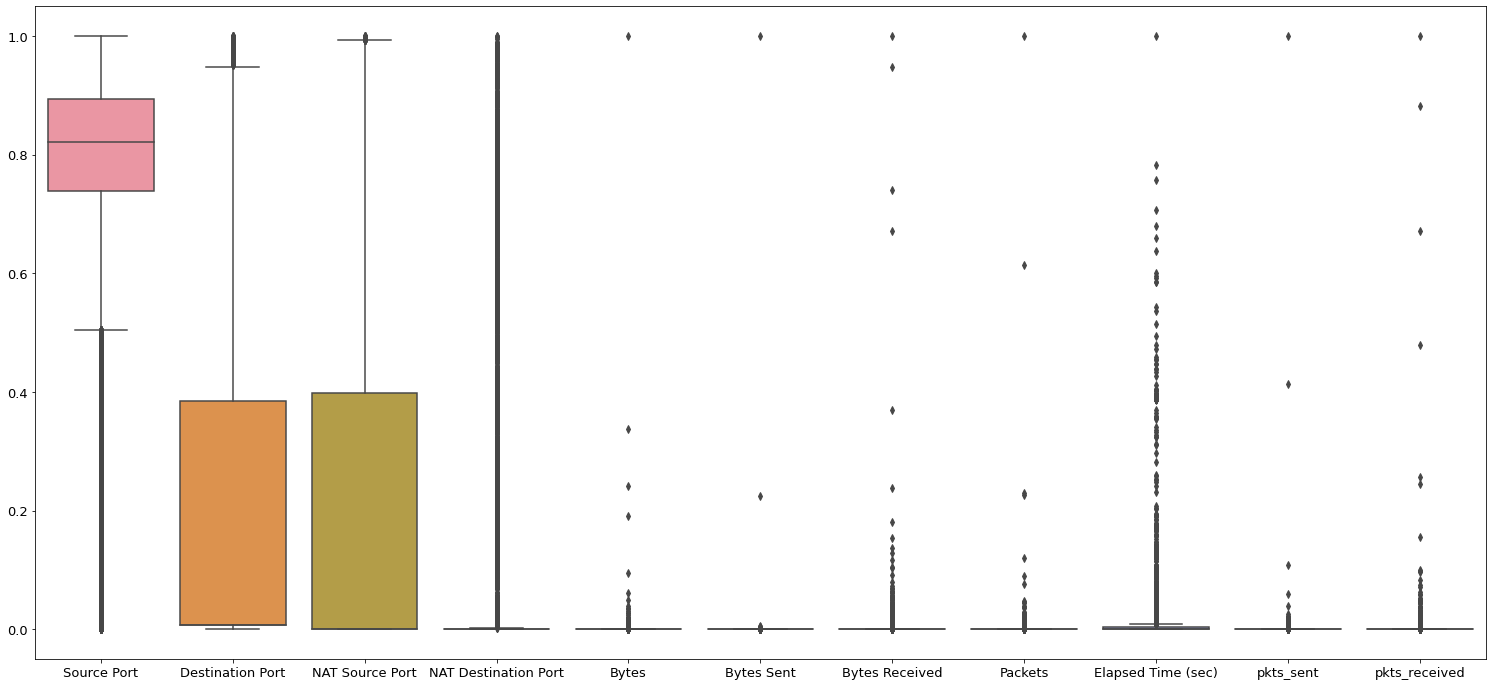

In [83]:
std_scaler = preprocessing.MinMaxScaler()
scaled_features = pd.DataFrame( std_scaler.fit_transform(features), columns=features.columns )

print(scaled_features.var(axis=0))

plt.figure(figsize=( 26,12 ) )
boxplot = sb.boxplot(data = scaled_features)
boxplot.tick_params(labelsize = 13)

scaled_features.describe()

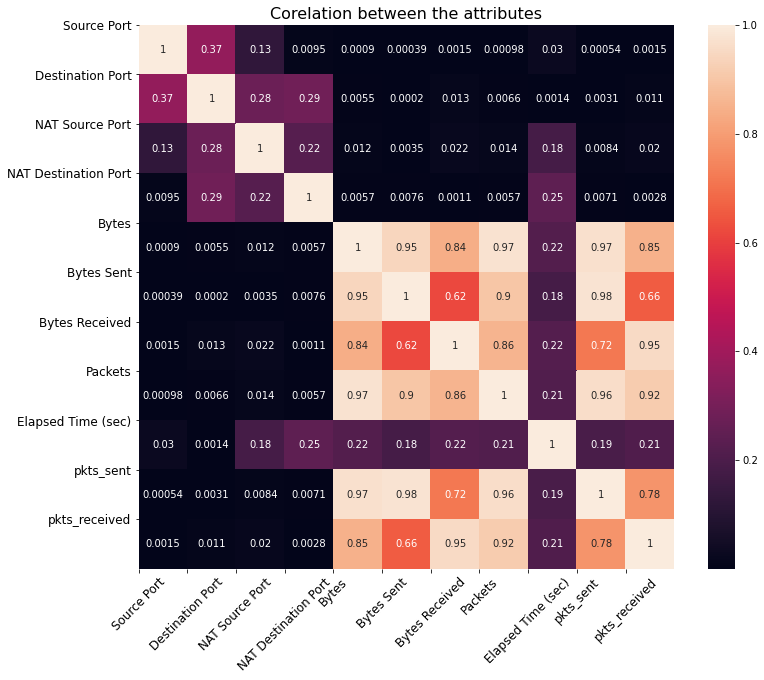

In [84]:
plt.figure(figsize=(12, 10))

plt.title( "Corelation between the attributes" ,  fontsize=16)
# cb = plt.colorbar()

corrMatrix = scaled_features.corr().abs()
sb.heatmap(corrMatrix, annot=True)
plt.xticks( range(len(attributes)), labels=scaled_features.columns , fontsize=12, rotation=45)
plt.yticks( range(len(attributes)), labels=scaled_features.columns ,fontsize=12)
plt.show()

(46658, 11)
(46658,)


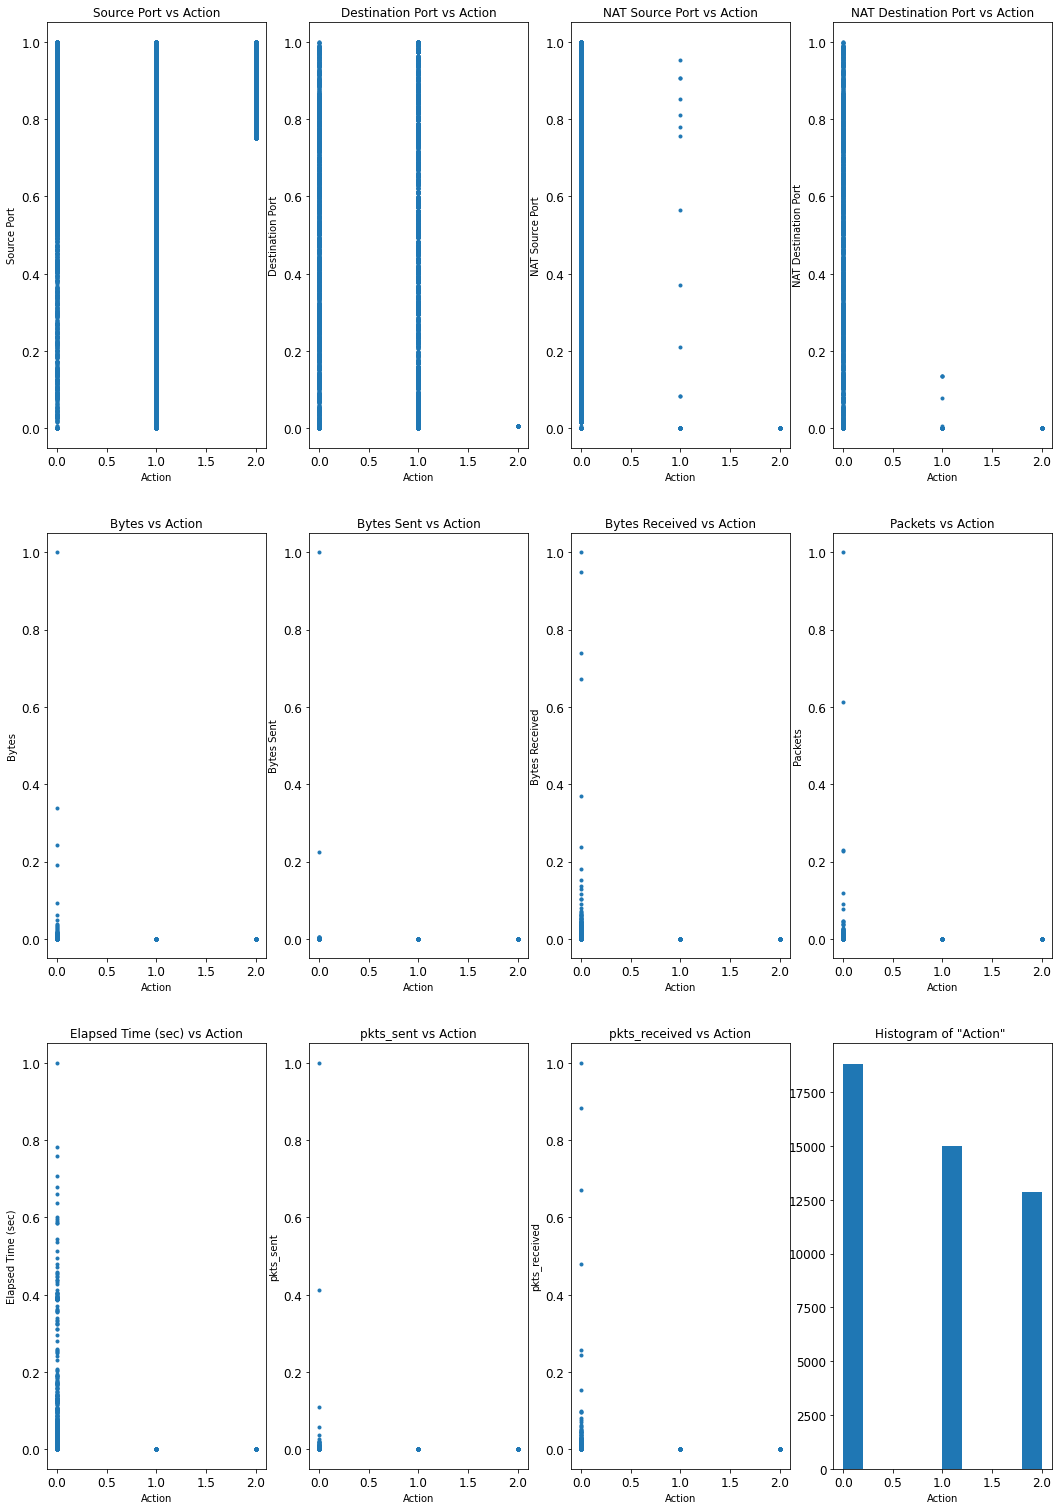

In [85]:
print(features.shape)
print(targets.shape)

plt.figure( figsize=(18,36) )

for i in range( 0 , len(attributes) ):
    plt.subplot(4 , 4, i+1)
    plt.scatter(  x= targets, y=scaled_features[ scaled_features.columns[i]], marker="." )
    plt.xlabel("Action")
    plt.ylabel(attributes[i])
    plt.xticks( fontsize=12)
    plt.yticks( fontsize=12)
    plt.title ( attributes[i] +" vs Action")

plt.subplot(4 , 4, i+2)
plt.hist( targets )
plt.xlabel("Action")
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.title ( "Histogram of \"Action\" " )
plt.show()

In [86]:
p_values = dict()
for i in range (0, len(attributes)):
    pear_coef, p_value = sp.stats.pearsonr( scaled_features[scaled_features.columns[i]] , targets)
    p_values[attributes[i]] = p_value

p_values = sorted( p_values.items() , key = lambda element: element[1] )
print("P_value of attribute:")
for item in p_values:
    print(item)

P_value of attribute:
('NAT Source Port', 0.0)
('NAT Destination Port', 0.0)
('Elapsed Time (sec)', 0.0)
('Source Port', 1.0818670584132798e-101)
('Bytes Received', 2.1328099102962227e-08)
('pkts_received', 3.920393305475963e-07)
('Packets', 0.00018740622920969882)
('Bytes', 0.0010130334934781442)
('pkts_sent', 0.011891159510576387)
('Destination Port', 0.10169734199275886)
('Bytes Sent', 0.16356741364461622)


#Split the data

In [87]:
x_train, x_test, y_train, y_test = train_test_split( scaled_features, targets, test_size = 0.3, random_state=13 )

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(type(x_train))
print(type(y_train))
print(x_test.shape)
print(y_test.shape)


models = ["KNN", "DT", "NB", "SGD"]
score_metrics = ["acc", "balance_acc", "precision", "recall", "f1", "MSE", "AIC", "BIC"]

models_scores = dict()

for item in models:
    models_scores[item]={"acc":0.0, "balance_acc":0.0, "precision":0.0, "recall":0.0, "f1":0.0,  "MSE":0.0, "AIC":0.0, "BIC":0.0}
    print(item ,": ", models_scores[item])

(32660, 11)
(32660,)
(13998, 11)
(13998,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(13998, 11)
(13998,)
KNN :  {'acc': 0.0, 'balance_acc': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'MSE': 0.0, 'AIC': 0.0, 'BIC': 0.0}
DT :  {'acc': 0.0, 'balance_acc': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'MSE': 0.0, 'AIC': 0.0, 'BIC': 0.0}
NB :  {'acc': 0.0, 'balance_acc': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'MSE': 0.0, 'AIC': 0.0, 'BIC': 0.0}
SGD :  {'acc': 0.0, 'balance_acc': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'MSE': 0.0, 'AIC': 0.0, 'BIC': 0.0}


#Classfications

##KNN classifier

n_neighbors 10
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5624
           1       0.99      0.99      0.99      4517
           2       0.99      1.00      1.00      3857

    accuracy                           0.99     13998
   macro avg       0.99      0.99      0.99     13998
weighted avg       0.99      0.99      0.99     13998

acc : 0.9934276325189313
balance_acc : 0.9940097354150114
precision : 0.993017613777763
recall : 0.9940097354150114
f1 : 0.9935026376499781
MSE : 0.007001000142877554
AIC : -69431.90827157962
BIC : -69348.89490442588

confusion matrix:
 [[5569   53    2]
 [  10 4480   27]
 [   0    0 3857]] 




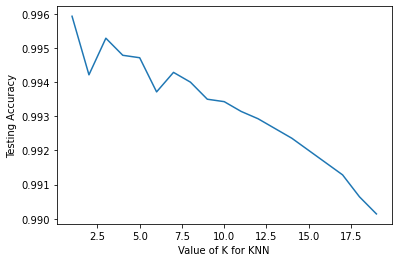

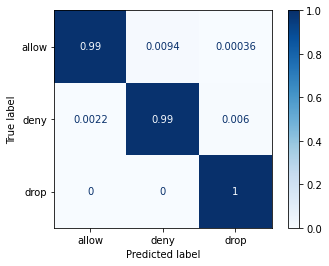

In [88]:
from sklearn.neighbors import KNeighborsClassifier

model_name='KNN'

k_range = range(1,20)
n_neighbors = 10
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')



model = KNeighborsClassifier(n_neighbors=n_neighbors)
print("n_neighbors", n_neighbors)
model.fit(x_train, y_train)

prediction = model.predict( x_test )

mseloss = MSEloss(y_test, prediction)


models_scores[model_name] = {"acc":model.score(x_test, y_test),
                        "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
                        "precision":metrics.precision_score(  y_test, prediction , average='macro' ), 
                        "recall":metrics.recall_score(  y_test, prediction , average='macro' ), 
                        "f1":metrics.f1_score(  y_test, prediction , average='macro' ),
                        "MSE":mseloss,
                        "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
                        "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
                        }

print(metrics.classification_report(y_test, prediction))

for item in models_scores[model_name]:
    print(item,":",models_scores[model_name][item])

print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
metrics.plot_confusion_matrix(model, x_test , y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

##Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5624
           1       1.00      1.00      1.00      4517
           2       1.00      1.00      1.00      3857

    accuracy                           1.00     13998
   macro avg       1.00      1.00      1.00     13998
weighted avg       1.00      1.00      1.00     13998

acc : 0.9978568366909558
balance_acc : 0.99777227292207
precision : 0.9975865031372116
recall : 0.99777227292207
f1 : 0.997678920185806
MSE : 0.0021431633090441492
AIC : -86002.32208950343
BIC : -85919.30872234968

confusion matrix:
 [[5618    6    0]
 [   0 4501   16]
 [   0    8 3849]] 




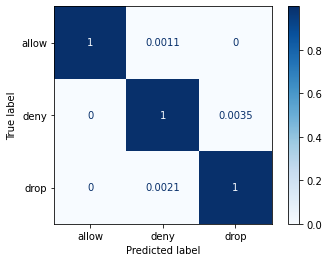

In [89]:
from sklearn.tree import DecisionTreeClassifier

model_name='DT'
model = DecisionTreeClassifier(random_state = 0, min_samples_split=3)
model.fit(x_train, y_train)

prediction = model.predict( x_test )
mseloss = MSEloss(y_test, prediction)

models_scores[model_name] = {"acc":model.score(x_test, y_test),
                        "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
                        "precision":metrics.precision_score(  y_test, prediction , average='macro' ), 
                        "recall":metrics.recall_score(  y_test, prediction , average='macro' ), 
                        "f1":metrics.f1_score(  y_test, prediction , average='macro' ),
                        "MSE":mseloss,
                        "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
                        "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
                        }

print(metrics.classification_report(y_test, prediction))

for item in models_scores[model_name]:
    print(item,":",models_scores[model_name][item])

print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
metrics.plot_confusion_matrix(model, x_test , y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

##Naive Bays

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5624
           1       1.00      1.00      1.00      4517
           2       1.00      1.00      1.00      3857

    accuracy                           1.00     13998
   macro avg       1.00      1.00      1.00     13998
weighted avg       1.00      1.00      1.00     13998

acc : 0.9970710101443063
balance_acc : 0.9972503774529455
precision : 0.9967846539948043
recall : 0.9972503774529455
f1 : 0.9970147966747643
MSE : 0.0029289898556936703
AIC : -81629.7012482834
BIC : -81546.68788112965

confusion matrix:
 [[5605   19    0]
 [   3 4495   19]
 [   0    0 3857]] 




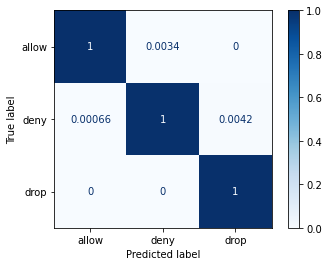

In [90]:
from sklearn.naive_bayes import GaussianNB

model_name='NB'
model = GaussianNB()
model.fit(x_train, y_train)

prediction = model.predict( x_test )
mseloss = MSEloss(y_test, prediction)

models_scores[model_name] = {"acc":model.score(x_test, y_test),
                        "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
                        "precision":metrics.precision_score(  y_test, prediction , average='macro' ), 
                        "recall":metrics.recall_score(  y_test, prediction , average='macro' ), 
                        "f1":metrics.f1_score(  y_test, prediction , average='macro' ),
                        "MSE":mseloss,
                        "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
                        "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
                        }

print(metrics.classification_report(y_test, prediction))

for item in models_scores[model_name]:
    print(item,":",models_scores[model_name][item])

print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
metrics.plot_confusion_matrix(model, x_test , y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

##SGDClassifire

In [91]:
# from sklearn.linear_model import SGDClassifier
# model_name = 'SGD'
# model = SGDClassifier(loss="hinge", max_iter=100)
# model.fit(x_train, y_train)

# prediction = model.predict( x_test )
# mseloss = MSEloss(y_test, prediction)

# models_scores[model_name] = {"acc":model.score(x_test, y_test),
#                         "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
#                         "precision":metrics.precision_score(  y_test, prediction , average='macro' ), 
#                         "recall":metrics.recall_score(  y_test, prediction , average='macro' ), 
#                         "f1":metrics.f1_score(  y_test, prediction , average='macro' ),
#                         "MSE":mseloss,
#                         "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
#                         "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
#                         }

# print(metrics.classification_report(y_test, prediction))

# for item in models_scores[model_name]:
#     print(item,":",models_scores[model_name][item])

# print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
# metrics.plot_confusion_matrix(model, x_test , y_test,
#                                  display_labels=classes,
#                                  cmap=plt.cm.Blues,
#                                  normalize='true')

#CV with DT

In [92]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_frame().to_numpy().flatten()
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_frame().to_numpy().flatten()

print(type(x_train_np))
print(type(y_train_np))
print(y_train_np.shape)

print(type(x_test_np))
print(type(y_test_np))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(32660,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>



K_fold:  1
acc : 0.9978567054500919
balance_acc : 0.9978908298861655
precision : 0.9976264887715174
recall : 0.9978908298861655
f1 : 0.997757475624859
MSE : 0.0021432945499081446
AIC : -20048.912732535668
BIC : -19981.908198526835

K_fold:  2
acc : 0.9984690753214942
balance_acc : 0.9982466344654343
precision : 0.9983147790400247
recall : 0.9982466344654343
f1 : 0.9982805280693254
MSE : 0.0015309246785058174
AIC : -21147.831057340547
BIC : -21080.826523331714

K_fold:  3
acc : 0.9969381506429884
balance_acc : 0.9967498027088629
precision : 0.996563140578437
recall : 0.9967498027088629
f1 : 0.9966552442643656
MSE : 0.003061849357011635
AIC : -18884.012365631766
BIC : -18817.007831622934

K_fold:  4
acc : 0.9987752602571953
balance_acc : 0.9986204767657845
precision : 0.9987388935856988
recall : 0.9986204767657845
f1 : 0.9986795344954875
MSE : 0.001224739742804654
AIC : -21876.61789593276
BIC : -21809.613361923926

K_fold:  5
acc : 0.9987752602571953
balance_acc : 0.9988076196476922
pre

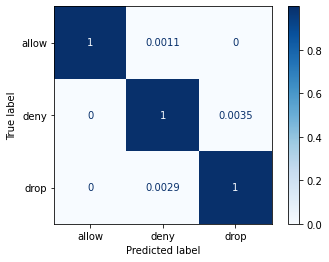

In [93]:
from sklearn.model_selection import KFold, cross_val_score

model_name='DT_Kfold'
model = DecisionTreeClassifier(random_state = 0)

k_fold = KFold(n_splits=10)
k_fold_scores = dict()
count=0
for train_indices, test_indices in k_fold.split(x_train_np):
    count +=1
    print("\nK_fold: ",count)
    # print('Train: %s | test: %s' % (train_indices, test_indices))
    model.fit(x_train_np[train_indices], y_train_np[train_indices])
    prediction = model.predict( x_train_np[test_indices] )
    mseloss = MSEloss(y_train_np[test_indices], prediction)

    k_fold_scores[count] = {"acc":model.score(x_train_np[test_indices], y_train_np[test_indices]),
                            "balance_acc": metrics.balanced_accuracy_score(y_train_np[test_indices], prediction), 
                            "precision":metrics.precision_score(  y_train_np[test_indices], prediction , average='macro' ), 
                            "recall":metrics.recall_score(  y_train_np[test_indices], prediction , average='macro' ), 
                            "f1":metrics.f1_score(  y_train_np[test_indices], prediction , average='macro' ),
                            "MSE":mseloss,
                            "AIC":AIC(mseloss, y_train_np[test_indices].shape[0], num_of_features ),
                            "BIC":BIC(mseloss, y_train_np[test_indices].shape[0], num_of_features )
                            }
    for item in k_fold_scores[count]:
        print(item,":",k_fold_scores[count][item])



prediction = model.predict( x_test )
mseloss = MSEloss(y_test, prediction)

models_scores[model_name] = {"acc":model.score(x_test, y_test),
                        "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
                        "precision":metrics.precision_score(  y_test, prediction , average='macro' ), 
                        "recall":metrics.recall_score(  y_test, prediction , average='macro' ), 
                        "f1":metrics.f1_score(  y_test, prediction , average='macro' ),
                        "MSE":mseloss,
                        "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
                        "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
                        }

print(metrics.classification_report(y_test, prediction))

for item in models_scores[model_name]:
    print(item,":",models_scores[model_name][item])

print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
metrics.plot_confusion_matrix(model, x_test , y_test,display_labels=classes, cmap=plt.cm.Blues,normalize='true')

#SVM

In [94]:
from sklearn import svm

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf', 'sigmoid']
              }

grid = GridSearchCV( svm.SVC() ,param_grid, cv=2, return_train_score=False)
grid.fit(x_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
# print(grid.cv_results_)

# print(len(grid.cv_results_['std_test_score']))

scr_df= pd.DataFrame(grid.cv_results_)

scr_df[["param_C", "param_gamma", "param_kernel","mean_test_score"]]

,param_C,param_gamma,param_kernel,mean_test_score
0,0.1,1,rbf,0.934844
1,0.1,1,sigmoid,0.918402
2,0.1,0.1,rbf,0.896938
3,0.1,0.1,sigmoid,0.877863
4,0.1,0.01,rbf,0.808634
5,0.1,0.01,sigmoid,0.856797
6,1,1,rbf,0.973178
7,1,1,sigmoid,0.930496
8,1,0.1,rbf,0.934752
9,1,0.1,sigmoid,0.924954


In [96]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.9834966319657072


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5624
           1       0.99      0.97      0.98      4517
           2       0.96      1.00      0.98      3857

    accuracy                           0.98     13998
   macro avg       0.98      0.99      0.98     13998
weighted avg       0.99      0.98      0.98     13998

acc : 0.9849264180597228
balance_acc : 0.9856929115475775
precision : 0.9829564106680753
recall : 0.9856929115475775
f1 : 0.9841542211212291
MSE : 0.02278896985283612
AIC : -52911.137981228036
BIC : -52828.12461407429

confusion matrix:
 [[5537   51   36]
 [   3 4393  121]
 [   0    0 3857]] 




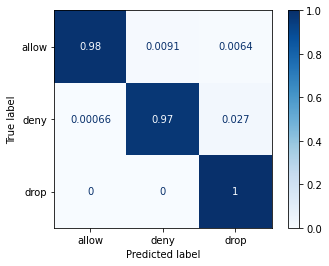

In [97]:
model_name='SVM'
model =  svm.SVC(C=10, gamma=1, kernel="rbf") 
model.fit(x_train, y_train)

prediction = model.predict( x_test )
mseloss = MSEloss(y_test, prediction)

models_scores[model_name] = {"acc":model.score(x_test, y_test),
                        "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
                        "precision":metrics.precision_score(  y_test, prediction , average='macro' ), 
                        "recall":metrics.recall_score(  y_test, prediction , average='macro' ), 
                        "f1":metrics.f1_score(  y_test, prediction , average='macro' ),
                        "MSE":mseloss,
                        "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
                        "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
                        }

print(metrics.classification_report(y_test, prediction))

for item in models_scores[model_name]:
    print(item,":",models_scores[model_name][item])

print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
metrics.plot_confusion_matrix(model, x_test , y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

#Grid search on DT, KNN, SVM

In [98]:
model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(random_state = 0),
        'params' : {
            "criterion": ["gini", "entropy"],
            'min_samples_split':[2,3]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors':[3,5,10],
        }
    },
    'svm': {
        'model': svm.SVC(gamma="auto"),
        'params' : {
            'C': [0.1, 1, 10], 
            'kernel': ['rbf', 'sigmoid']
        }  
    }
}

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    print(scores)
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

[{'model': 'decision_tree', 'best_score': 0.9980404164115126, 'best_params': {'criterion': 'gini', 'min_samples_split': 2}}]
[{'model': 'decision_tree', 'best_score': 0.9980404164115126, 'best_params': {'criterion': 'gini', 'min_samples_split': 2}}, {'model': 'KNN', 'best_score': 0.9930496019595836, 'best_params': {'n_neighbors': 3}}]
[{'model': 'decision_tree', 'best_score': 0.9980404164115126, 'best_params': {'criterion': 'gini', 'min_samples_split': 2}}, {'model': 'KNN', 'best_score': 0.9930496019595836, 'best_params': {'n_neighbors': 3}}, {'model': 'svm', 'best_score': 0.971341090018371, 'best_params': {'C': 10, 'kernel': 'rbf'}}]


,model,best_score,best_params
0,decision_tree,0.998040,"{'criterion': 'gini', 'min_samples_split': 2}"
1,KNN,0.993050,{'n_neighbors': 3}
2,svm,0.971341,"{'C': 10, 'kernel': 'rbf'}"


#ANN

In [99]:
from sklearn.neural_network import MLPClassifier

model_name="MLP"
param_grid ={
            'hidden_layer_sizes':[(2,3),(3,3),(4,3)],
            'max_iter': [100,200,250], 
            'activation': ["logistic", "tanh", "relu"],
            }
grid = GridSearchCV( MLPClassifier() ,param_grid, cv=2, return_train_score=False)
grid.fit(x_train,y_train)

print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=250,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
{'activation': 'relu', 'hidden_layer_sizes': (3, 3), 'max_iter': 250}
0.9911818738518066


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5624
           1       1.00      0.99      0.99      4517
           2       0.99      1.00      1.00      3857

    accuracy                           1.00     13998
   macro avg       1.00      1.00      1.00     13998
weighted avg       1.00      1.00      1.00     13998

acc : 0.9966423774824975
balance_acc : 0.9968511821890287
precision : 0.9963064908608085
recall : 0.9968511821890287
f1 : 0.9965751595366367
MSE : 0.0033576225175025003
AIC : -79717.91690927288
BIC : -79634.90354211914

confusion matrix:
 [[5602   22    0]
 [   3 4492   22]
 [   0    0 3857]] 




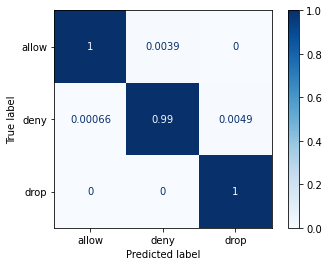

In [100]:
model_name = "MLP"
model = MLPClassifier(hidden_layer_sizes=(3,3), activation="relu", max_iter = 250)
model.fit(x_train, y_train)

prediction = model.predict( x_test )
mseloss = MSEloss(y_test, prediction)

models_scores[model_name] = {"acc":model.score(x_test, y_test),
                        "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
                        "precision":metrics.precision_score(  y_test, prediction , average='macro' ), 
                        "recall":metrics.recall_score(  y_test, prediction , average='macro' ), 
                        "f1":metrics.f1_score(  y_test, prediction , average='macro' ),
                        "MSE":mseloss,
                        "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
                        "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
                        }

print(metrics.classification_report(y_test, prediction))

for item in models_scores[model_name]:
    print(item,":",models_scores[model_name][item])

print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
metrics.plot_confusion_matrix(model, x_test , y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

#Compare

[0.9940097354150114, 0.99777227292207, 0.9972503774529455, 0.0, 0.9975130040602602, 0.9856929115475775, 0.9968511821890287]
[0.007001000142877554, 0.0021431633090441492, 0.0029289898556936703, 0.0, 0.002357479639948564, 0.02278896985283612, 0.0033576225175025003]


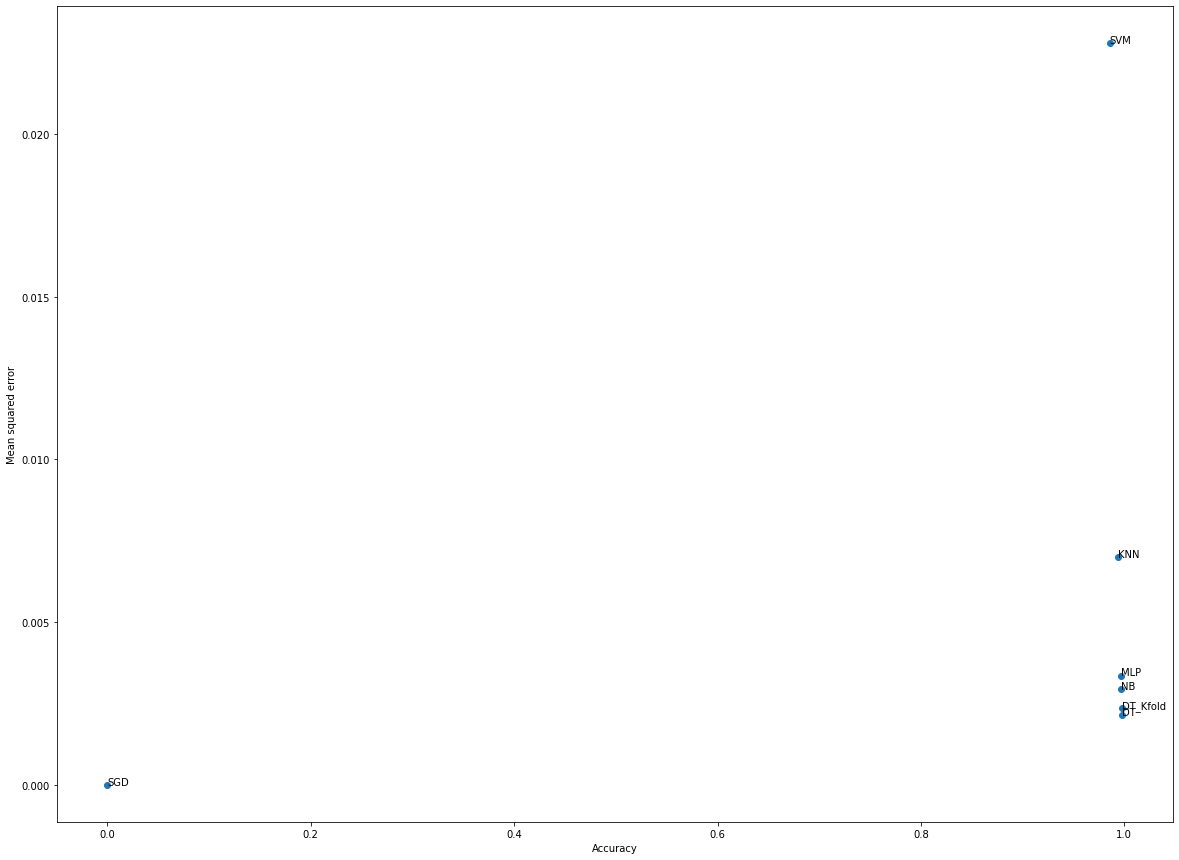

In [132]:
# acc = [] ["acc", "balance_acc", "precision", "recall", "f1", "MSE", "AIC", "BIC"]
balanced_acc = []
MSE = []

Models = models_scores.keys()

for item in models_scores:
    balanced_acc.append(models_scores[item]["balance_acc"])
    MSE.append(models_scores[item]["MSE"])
print(balanced_acc)
print(MSE)

plt.figure(figsize=(20,15))
plt.scatter( balanced_acc, MSE )
for i, txt in enumerate(Models):
    plt.annotate(txt, (balanced_acc[i], MSE[i]))
plt.ylabel("Mean squared error")
plt.xlabel("Accuracy")
plt.show()

##ANN (keras)

Epoch 1/5
1021/1021 [==============================] - 1s 649us/step - loss: 0.5817 - accuracy: 0.8144
Epoch 2/5
1021/1021 [==============================] - 1s 642us/step - loss: 0.2347 - accuracy: 0.9244
Epoch 3/5
1021/1021 [==============================] - 1s 642us/step - loss: 0.1755 - accuracy: 0.9384
Epoch 4/5
1021/1021 [==============================] - 1s 655us/step - loss: 0.1447 - accuracy: 0.9566
Epoch 5/5
1021/1021 [==============================] - 1s 634us/step - loss: 0.1246 - accuracy: 0.9679
438/438 - 0s - loss: 0.1134 - accuracy: 0.9716
Epoch 1/5
1021/1021 [==============================] - 1s 623us/step - loss: 0.5282 - accuracy: 0.8398
Epoch 2/5
1021/1021 [==============================] - 1s 656us/step - loss: 0.2246 - accuracy: 0.9252
Epoch 3/5
1021/1021 [==============================] - 1s 635us/step - loss: 0.1680 - accuracy: 0.9403
Epoch 4/5
1021/1021 [==============================] - 1s 660us/step - loss: 0.1379 - accuracy: 0.9574
Epoch 5/5
1021/1021 [=====

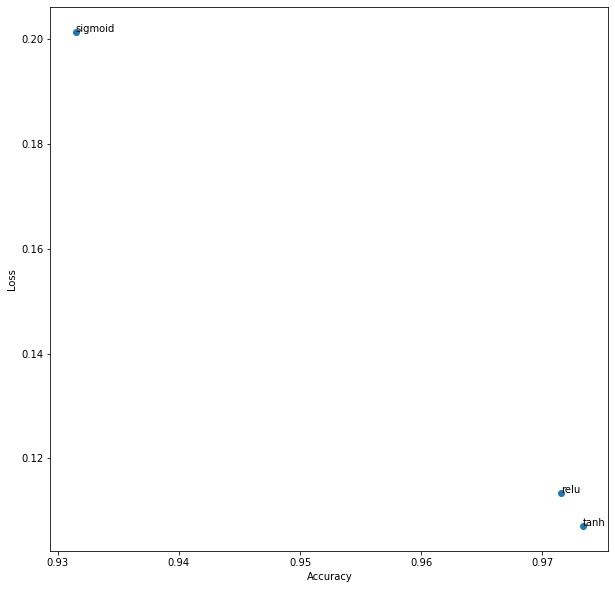

In [139]:
import tensorflow as tf
from tensorflow import keras

acc = []
loss = []


activations = ['relu','tanh','sigmoid']
# archtecture
for funct in activations: 
    model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(11,1)),
                            keras.layers.Dense(11, activation=funct),
                            keras.layers.Dense(3),
                            keras.layers.Softmax()
                            ])
    model.compile(optimizer="adam",
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), #False #if we add Softmax for probability,
                metrics =['accuracy'] ) 

    model.fit(x_train, y_train, epochs= 5)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    acc.append(test_acc)
    loss.append(test_loss)
print(acc)
print(loss)

plt.figure(figsize=(10,10))
plt.scatter( acc, loss )
for i, txt in enumerate(activations):
    plt.annotate(txt, (acc[i], loss[i]))

plt.xlabel("Accuracy")
plt.ylabel("Loss")
plt.show()

Epoch 1/5
1021/1021 [==============================] - 1s 670us/step - loss: 0.4194 - accuracy: 0.8553
Epoch 2/5
1021/1021 [==============================] - 1s 660us/step - loss: 0.1414 - accuracy: 0.9581
Epoch 3/5
1021/1021 [==============================] - 1s 675us/step - loss: 0.1033 - accuracy: 0.9737
Epoch 4/5
1021/1021 [==============================] - 1s 672us/step - loss: 0.0878 - accuracy: 0.9778
Epoch 5/5
1021/1021 [==============================] - 1s 667us/step - loss: 0.0797 - accuracy: 0.9805
438/438 - 0s - loss: 0.0738 - accuracy: 0.9819
Epoch 1/5
1021/1021 [==============================] - 1s 676us/step - loss: 0.3968 - accuracy: 0.8806
Epoch 2/5
1021/1021 [==============================] - 1s 664us/step - loss: 0.1333 - accuracy: 0.9600
Epoch 3/5
1021/1021 [==============================] - 1s 667us/step - loss: 0.0946 - accuracy: 0.9761
Epoch 4/5
1021/1021 [==============================] - 1s 671us/step - loss: 0.0816 - accuracy: 0.9801
Epoch 5/5
1021/1021 [=====

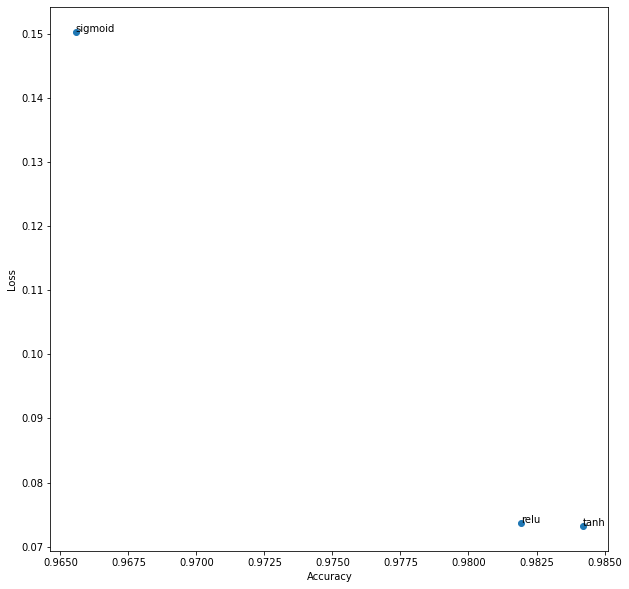

In [140]:
acc = []
loss = []


activations = ['relu','tanh','sigmoid']
# archtecture
for funct in activations: 
    model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(11,1)),
                            keras.layers.Dense(11, activation=funct),
                            keras.layers.Dense(6, activation=funct),
                            keras.layers.Dense(3),
                            keras.layers.Softmax()
                            ])
    model.compile(optimizer="adam",
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), #False #if we add Softmax for probability,
                metrics =['accuracy'] ) 

    model.fit(x_train, y_train, epochs= 5)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    acc.append(test_acc)
    loss.append(test_loss)
print(acc)
print(loss)

plt.figure(figsize=(10,10))
plt.scatter( acc, loss )
for i, txt in enumerate(activations):
    plt.annotate(txt, (acc[i], loss[i]))

plt.xlabel("Accuracy")
plt.ylabel("Loss")
plt.show()

Epoch 1/5
1021/1021 [==============================] - 1s 706us/step - loss: 0.5851 - accuracy: 0.8338
Epoch 2/5
1021/1021 [==============================] - 1s 706us/step - loss: 0.1954 - accuracy: 0.9706
Epoch 3/5
1021/1021 [==============================] - 1s 686us/step - loss: 0.1130 - accuracy: 0.9801
Epoch 4/5
1021/1021 [==============================] - 1s 727us/step - loss: 0.0695 - accuracy: 0.9832
Epoch 5/5
1021/1021 [==============================] - 1s 713us/step - loss: 0.0640 - accuracy: 0.9847
438/438 - 0s - loss: 0.0596 - accuracy: 0.9854
Epoch 1/5
1021/1021 [==============================] - 1s 710us/step - loss: 0.3054 - accuracy: 0.8993
Epoch 2/5
1021/1021 [==============================] - 1s 710us/step - loss: 0.0916 - accuracy: 0.9774
Epoch 3/5
1021/1021 [==============================] - 1s 707us/step - loss: 0.0747 - accuracy: 0.9821
Epoch 4/5
1021/1021 [==============================] - 1s 706us/step - loss: 0.0694 - accuracy: 0.9844
Epoch 5/5
1021/1021 [=====

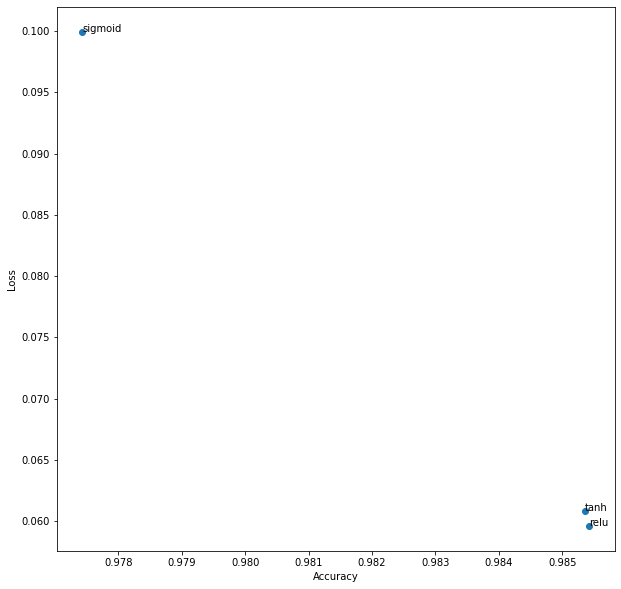

In [141]:
acc = []
loss = []


activations = ['relu','tanh','sigmoid']
# archtecture
for funct in activations: 
    model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(11,1)),
                            keras.layers.Dense(11, activation=funct),
                            keras.layers.Dense(9, activation=funct),
                            keras.layers.Dense(6, activation=funct),
                            keras.layers.Dense(3),
                            keras.layers.Softmax()
                            ])
    model.compile(optimizer="adam",
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), #False #if we add Softmax for probability,
                metrics =['accuracy'] ) 

    model.fit(x_train, y_train, epochs= 5)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    acc.append(test_acc)
    loss.append(test_loss)
print(acc)
print(loss)

plt.figure(figsize=(10,10))
plt.scatter( acc, loss )
for i, txt in enumerate(activations):
    plt.annotate(txt, (acc[i], loss[i]))

plt.xlabel("Accuracy")
plt.ylabel("Loss")
plt.show()